In [142]:
import numpy as np 
import pandas as pd 
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import json
from IPython.core.display import HTML
from fastnumbers import isfloat 
from fastnumbers import fast_float
from multiprocessing.dummy import Pool as ThreadPool 


sns.set_style('whitegrid')
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Utility Function for Data Type Conversions

In [143]:
def ffloat(string):
    if string is None:
        return np.nan
    if type(string) == float or type(string) == np.float64:
        return string
    if type(string)==int or type(string)==np.int64:
        return string
    
    return fast_float(string.split(" ")[0].replace(',','').replace('%',''),default=np.nan)

In [144]:
def ffloat_list(string_list):
    return list(map(ffloat,string_list))

In [145]:
def remove_multiple_spaces(string):
    if type(string) == str:
        return ' '.join(string.split())
    return string

In [146]:
## User Input for NASDAQ_Symbol

NASDAQ_Symbol = input("Enter Company Symbol")
response = requests.get(f"https://finance.yahoo.com/quote/{NASDAQ_Symbol}", timeout=240)

Enter Company Symbol WFC


## Company Address and Website

In [147]:
URL = f"https://finance.yahoo.com/quote/{NASDAQ_Symbol}/profile"
html_text = requests.get(URL).text
com_soup = BeautifulSoup(html_text,'lxml')

Company_info = {}
company = com_soup.find("div", class_="asset-profile-container")

for i,string in enumerate(company.strings):
    if i == 0:
        Company_info["name"] = string
        continue
    if i == 1:
        Company_info["address"] = string
        continue
    if i < 4:
        Company_info["address"] += ", " + string
    if i == 4:
        Company_info["telephone_no"] = string
    if i == 5:
        Company_info["website"] = string
    if i == 8:
        Company_info["Sector(s)"] = string
    if i == 11:
        Company_info["Industry"] = string
    if i == 14:
        Company_info["full_time_employees"] = string
        
    
Company_info

{'name': 'Wells Fargo & Company',
 'address': '420 Montgomery Street, San Francisco, CA 94104, United States',
 'telephone_no': '866 249 3302',
 'website': 'http://www.wellsfargo.com',
 'Sector(s)': 'Financial Services',
 'Industry': 'Banks—Diversified',
 'full_time_employees': '264,513'}

## Company Description

In [148]:
URL = f"https://finance.yahoo.com/quote/{NASDAQ_Symbol}/profile"
html_text = requests.get(URL).text
des_soup = BeautifulSoup(html_text,'lxml')

Description = des_soup.find('p',class_="Mt(15px) Lh(1.6)").text

Description

"Wells Fargo & Company (NYSE: WFC) is a leading financial services company that has approximately $1.9 trillion in assets and proudly serves one in three U.S. households and more than 10% of all middle market companies in the U.S. We provide a diversified set of banking, investment and mortgage products and services, as well as consumer and commercial finance, through our four reportable operating segments: Consumer Banking and Lending, Commercial Banking, Corporate and Investment Banking, and Wealth and Investment Management. Wells Fargo ranked No. 30 on Fortune's 2020 rankings of America's largest corporations. In the communities we serve, the company focuses its social impact on building a sustainable, inclusive future for all by supporting housing affordability, small business growth, financial health and a low-carbon economy."

## Stock Price Chart

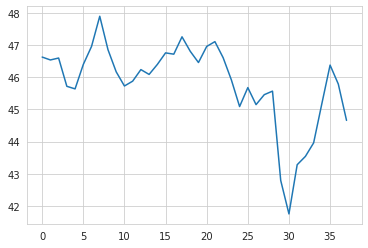

In [152]:

#NASDAQ_Symbol = input("Enter Company Symbol")
URL = f"https://finance.yahoo.com/quote/{NASDAQ_Symbol}/history"
#URL = f"https://finance.yahoo.com/quote/GOOG/history"
html_text = requests.get(URL).text
soup = BeautifulSoup(html_text,'lxml')
rows = soup.find_all('tr',class_="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)")

Adj_Close = []

reactid = 63
for row in rows:
    close_val = row.find('span', attrs = {'data-reactid':reactid})
    if close_val == None:
        continue
    Adj_Close.append(ffloat(close_val.text))
    reactid += 15

plt.plot(Adj_Close[::-1])
plt.show()

## Company's Financial

In [153]:
## Income Statement
URL = f"https://finance.yahoo.com/quote/{NASDAQ_Symbol}/financials"
html_text = requests.get(URL).text
soup = BeautifulSoup(html_text,'lxml')
Table = soup.find('div',class_="M(0) Whs(n) BdEnd Bdc($seperatorColor) D(itb)")


## Header Information
Header = Table.find('div',attrs = {"class":"D(tbhg)","data-reactid":"36"})
span_tags = Header.find_all('span')

Income_Statement = {}

Income_Statement[span_tags[0].text] = [span_tags[i].text for i in range(1,6)]


Breakdown_spans = soup.find_all('span',class_="Va(m)")

#Col Data
fin_cols = Table.find_all('div',attrs = {"data-test":"fin-col"})

column = []

for i,fin_col in enumerate(fin_cols):
    if i%5 == 0:
        column.append([fin_col.text])
    column[-1].append(fin_col.text)
    

for i,span_tag in enumerate(Breakdown_spans):
    Income_Statement[span_tag.text] = column[i]

Income_Statement

{'Breakdown': ['ttm', '12/31/2020', '12/31/2019', '12/31/2018', '12/31/2017'],
 'Total Revenue': ['72,686,000',
  '72,686,000',
  '72,340,000',
  '85,063,000',
  '86,408,000',
  '87,121,000'],
 'Credit Losses Provision': ['-9,076,000',
  '-9,076,000',
  '-14,129,000',
  '-2,687,000',
  '-1,744,000',
  '-2,528,000'],
 'Non Interest Expense': ['57,059,000',
  '57,059,000',
  '56,131,000',
  '58,178,000',
  '56,126,000',
  '58,484,000'],
 'Income from Associates & Other Participating Interests': ['-',
  '-',
  '-',
  '-',
  '1,515,000',
  '1,268,000'],
 'Special Income Charges': ['-1,512,000',
  '-1,512,000',
  '-1,499,000',
  '-',
  '-',
  '-'],
 'Other Non Operating Income Expenses': ['-',
  '-',
  '-',
  '-4,321,000',
  '-',
  '-'],
 'Pretax Income': ['5,039,000',
  '5,039,000',
  '581,000',
  '24,198,000',
  '28,538,000',
  '27,377,000'],
 'Tax Provision': ['-2,838,000',
  '-2,838,000',
  '-3,005,000',
  '4,157,000',
  '5,662,000',
  '4,917,000'],
 'Net Income Common Stockholders': ['

In [154]:
## Balance Sheet
URL = f"https://finance.yahoo.com/quote/{NASDAQ_Symbol}/balance-sheet"
html_text = requests.get(URL).text
soup = BeautifulSoup(html_text,'lxml')

Balance_Sheet_Table = soup.find('div',class_="M(0) Whs(n) BdEnd Bdc($seperatorColor) D(itb)")
BS_span_tags = Balance_Sheet_Table.find_all('span')


Balance_Sheet = {}
for i, span_tag in enumerate(BS_span_tags):
        if i%5 == 0:
            key = span_tag.text 
            Balance_Sheet[key] = []
            continue
        Balance_Sheet[key].append(span_tag.text)

Balance_Sheet

{'Breakdown': ['12/31/2020', '12/31/2019', '12/31/2018', '12/31/2017'],
 'Total Assets': ['1,955,163,000',
  '1,927,555,000',
  '1,895,883,000',
  '1,951,757,000'],
 'Total Liabilities Net Minority Interest': ['1,769,243,000',
  '1,739,571,000',
  '1,698,817,000',
  '1,743,678,000'],
 'Total Equity Gross Minority Interest': ['185,920,000',
  '187,984,000',
  '197,066,000',
  '208,079,000'],
 'Total Capitalization': ['397,809,000',
  '415,305,000',
  '425,174,000',
  '431,917,000'],
 'Preferred Stock Equity': ['21,136,000',
  '21,549,000',
  '23,214,000',
  '25,358,000'],
 'Common Stock Equity': ['163,751,000',
  '165,597,000',
  '172,952,000',
  '181,578,000'],
 'Capital Lease Obligations': ['28,000', '32,000', '36,000', '39,000'],
 'Net Tangible Assets': ['150,730,000',
  '147,386,000',
  '153,111,000',
  '163,690,000'],
 'Invested Capital': ['389,310,000',
  '405,865,000',
  '415,317,000',
  '421,131,000'],
 'Tangible Book Value': ['129,594,000',
  '125,837,000',
  '129,897,000',
  '

## Analysis Tables

In [155]:

URL = f"https://finance.yahoo.com/quote/{NASDAQ_Symbol}/analysis"
html_text = requests.get(URL).text
Analysis = BeautifulSoup(html_text,'lxml')

Tables = Analysis.find_all('table',class_="W(100%) M(0) BdB Bdc($seperatorColor) Mb(25px)")
#Tables



Tables_lst = []

for i,Table_info in enumerate(Tables):
    Table = {}
    
    spans_finds = Table_info.find_all('span') 
    
    if i == 2:
        Table[spans_finds[0].text] = [spans_finds[1].text,spans_finds[2].text,
                                        spans_finds[3].text,spans_finds[4].text]

        spans_finds = spans_finds[5:]

        for i, span_tag in enumerate(spans_finds):
            if i%5 == 0:
                span_key = span_tag.text 
                Table[span_key] = []
                continue
            Table[span_key].append(span_tag.text)
        
        Tables_lst.append(Table)
        
        continue
        
    if i == 5:
        th_finds = Tables[5].find_all('th') 
        td_finds = Tables[5].find_all('td') 

        table_finds = th_finds + td_finds

        for i, tag in enumerate(table_finds):
            if i%5 == 0:
                key = tag.text 
                Table[key] = []
                continue
            Table[key].append(tag.text)
        
        Tables_lst.append(Table)
        continue
        
    
    Table[spans_finds[0].text] = [spans_finds[1].text,spans_finds[4].text,
                                      spans_finds[7].text,spans_finds[9].text]

    spans_finds = spans_finds[11:]

    for i, span_tag in enumerate(spans_finds):
        if i%5 == 0:
            span_key = span_tag.text 
            Table[span_key] = []
            continue
        Table[span_key].append(span_tag.text)
     
    Tables_lst.append(Table)
    

    
Tables_lst

[{'Earnings Estimate': ['Current Qtr. (Jun 2021)',
   'Next Qtr. (Sep 2021)',
   'Current Year (2021)',
   'Next Year (2022)'],
  'No. of Analysts': ['21', '21', '24', '23'],
  'Avg. Estimate': ['0.93', '0.97', '3.81', '3.54'],
  'Low Estimate': ['0.76', '0.66', '3', '2.75'],
  'High Estimate': ['1.15', '1.28', '4.88', '4.34'],
  'Year Ago EPS': ['-0.66', '0.42', '0.41', '3.81']},
 {'Revenue Estimate': ['Current Qtr. (Jun 2021)',
   'Next Qtr. (Sep 2021)',
   'Current Year (2021)',
   'Next Year (2022)'],
  'No. of Analysts': ['14', '13', '15', '14'],
  'Avg. Estimate': ['17.78B', '18.01B', '71.06B', '70.19B'],
  'Low Estimate': ['17.24B', '17.27B', '68.16B', '68.78B'],
  'High Estimate': ['18.73B', '19.25B', '73.4B', '71.85B'],
  'Year Ago Sales': ['17.84B', '17.97B', '72.34B', '71.06B'],
  'Sales Growth (year/est)': ['-0.30%', '0.20%', '-1.80%', '-1.20%']},
 {'Earnings History': ['6/29/2020', '9/29/2020', '12/30/2020', '3/30/2021'],
  'EPS Est.': ['-0.2', '0.45', '0.6', '0.7'],
  'EP